In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data = pd.read_csv("classification.csv")

In [3]:
data.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


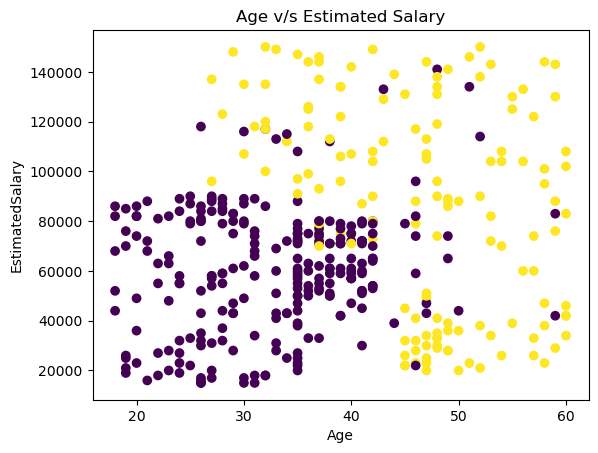

In [4]:
plt.scatter(x=data['Age'], y=data['EstimatedSalary'], c=data['Purchased'])

plt.title("Age v/s Estimated Salary")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.show()

In [5]:
class LogisticRegressionScratch():
    
    def __init__(self, learning_rate=0.001, no_of_iters=1000):
        self.learning_rate = learning_rate 
        self.no_of_iters = no_of_iters
        self.cost_history = []
        
  
    def fit(self, x, y):
        self.m, self.n = x.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.x = x
        self.y = y
        
        # Gradient Descent
        for _ in range(self.no_of_iters):
            self._update_weights()
            self._calculate_cost()
        
        
    def predict(self, x):
        z = np.dot(x, self.w) + self.b
        y_pred = self._sigmoid(z)
        return y_pred
        
    
    # '_<function_name>' = Inner function used by the class
    def _update_weights(self):
        y_pred = self.predict(self.x)
            
        # Calculate Gradients
        dw = np.dot(self.x.T, self.y - y_pred) / self.m
        db = np.sum(self.y - y_pred) / self.m
        
        # Update
        self.w = self.w + self.learning_rate * dw
        self.b = self.b + self.learning_rate * db
        
        
    def _calculate_cost(self):
        y_pred = self.predict(self.x)
        
        # Here, Cost = Sum(Binary Cross Entropy Loss Function)
        cost = -np.sum(self.y * np.log(y_pred) + (1 - self.y) * np.log(1 - y_pred))
        self.cost_history.append(cost)
        
        
    def get_cost(self):
        return self.cost_history
    
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

In [6]:
model = LogisticRegressionScratch()

In [7]:
# Split 'Features' & 'Target'

X = data[['Age', 'EstimatedSalary']]
Y = data['Purchased']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [9]:
# Scaling the Features

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
ITERATIONS = 1000

model = LogisticRegressionScratch(no_of_iters=ITERATIONS, learning_rate=0.01)
model.fit(x_train, y_train)

In [11]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

In [12]:
print("Accuracy =", accuracy_score(y_pred, y_test))

Accuracy = 0.8666666666666667


In [13]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        85
           1       0.73      0.86      0.79        35

    accuracy                           0.87       120
   macro avg       0.83      0.86      0.85       120
weighted avg       0.88      0.87      0.87       120



In [14]:
cost = model.get_cost()

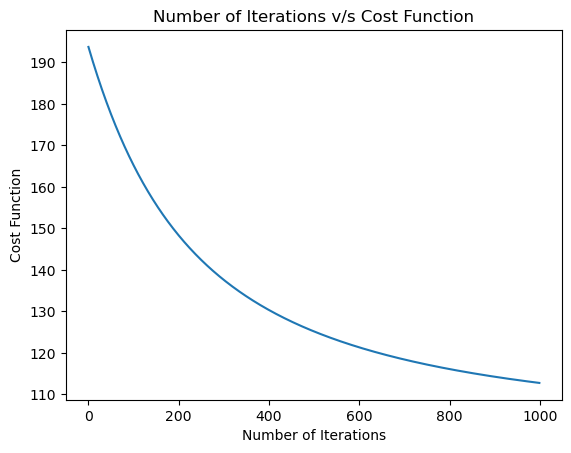

In [15]:
plt.plot([x for x in range(ITERATIONS)], model.get_cost())

plt.title("Number of Iterations v/s Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function")
plt.show()

<h4>Using Scikit Learn's Logistic Regression</h4>

In [16]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Accuracy =", accuracy_score(y_pred, y_test))

Accuracy = 0.8666666666666667


In [17]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        85
           1       0.73      0.86      0.79        35

    accuracy                           0.87       120
   macro avg       0.83      0.86      0.85       120
weighted avg       0.88      0.87      0.87       120

